In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import import_ipynb
from clean_tests import df_equipment, df_personnel, index_by_datetime


importing Jupyter notebook from clean_tests.ipynb


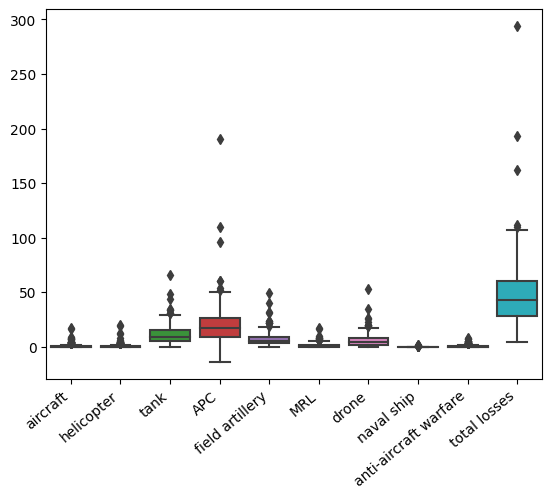

In [2]:
ax = sns.boxplot(df_equipment)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()
# Muchos outliers, pero necesarios
# APC se parece a la de pérdidas totales, y es de donde vienen los mayores outliers

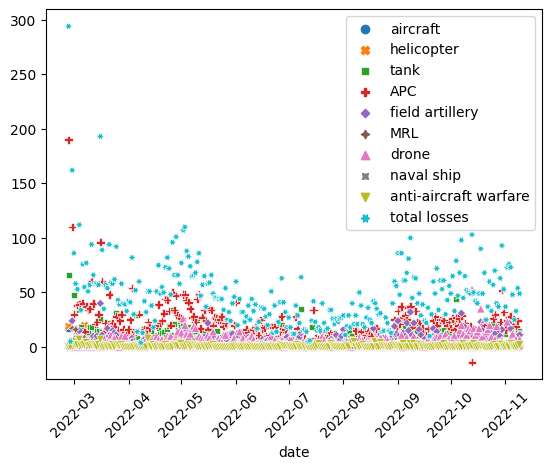

In [3]:
ax = sns.scatterplot(df_equipment)
ax.tick_params(axis='x', labelrotation = 45)
plt.show()
# vemos que efectivamente en el mes 6 hay una bajada de bajas totales, que parece durar hasta el 9


In [4]:
# Parece que hay un error. Lo reporto y me responden: https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war/discussion/369515

df_equipment[df_equipment.index == '2022-10-13']


,aircraft,helicopter,tank,APC,field artillery,MRL,drone,naval ship,anti-aircraft warfare,total losses
date,,,,,,,,,,
2022-10-13,0,5,6,-14,49,2,53,1,1,103


In [5]:
# Por lo visto se trata de una pequeña corrección que no debería afectar al análisis


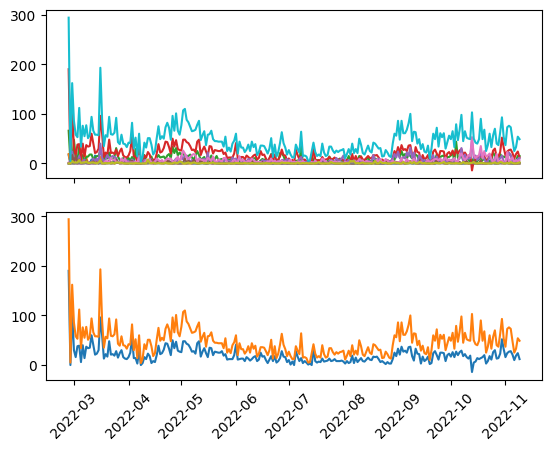

In [6]:
# parece que la caída de pérdidas a partir del mes 6 está relacionada con una bajada en APC perdidos
# Eso explicaría que las bajas de personal también se reduzcan en ese período, ya que los APC son las siglas de 'Armoured personnel carrier'
# Lo vere mejor comparando un gráfico con y uno sin el resto de tipos de baja

fig, ax = plt.subplots(2)
ax[0].plot(df_equipment.index, df_equipment)
ax[0].tick_params(labelbottom=False)
ax[1].plot(df_equipment.index, df_equipment[['APC', 'total losses']],)
ax[1].tick_params(axis='x', labelrotation = 45)
plt.show()


In [7]:
# Ultima comprobación de que las bajas a partir del mes 6 sufren un giro que dura hasta el 9
# probabilidad de que un conjunto de bajas diarias entre el mes 6 (incluido, que es el estándar al calcular intervalos) y el 9 esté por debajo de la mediana (la mediana, ya que he visto que hay outliers al principio de la gráfica)
# Fórmula de la probabilidad condidionada
# Tengo que dividir la probabilidad de que un conjunto de bajas diarias al azar esté entre el mes 6 y el 9 y esté por debajo de la mediana (interseccion) entre el porcentaje de fechas en este intervalo

In [8]:
# Probabilidad de que un conjunto de bajas menor que la mediana esté entre el mes 6 y el 9

p_interseccion_mediana_periodo = (len(df_equipment[(df_equipment['total losses'] < df_equipment['total losses'].median())
                                    & (df_equipment.index >= '2022-06-01') 
                                    & (df_equipment.index < '2022-09-01')]
                                        ) / len(df_equipment['total losses'] < df_equipment['total losses'].median())
                                    )

p_periodo = len(df_equipment[(df_equipment.index >= '2022-06-01') & (df_equipment.index < '2022-09-01')]) / len(df_equipment.index)

p_periodo_mediana = p_interseccion_mediana_periodo / p_periodo * 100

p_periodo_mediana


90.21739130434783

In [9]:
# El 90% de las bajas diarias que se encuentran en este período están por debajo de la mediana. Esto demuestra matemáticamente que hay una bajada entre los meses 6 y 9

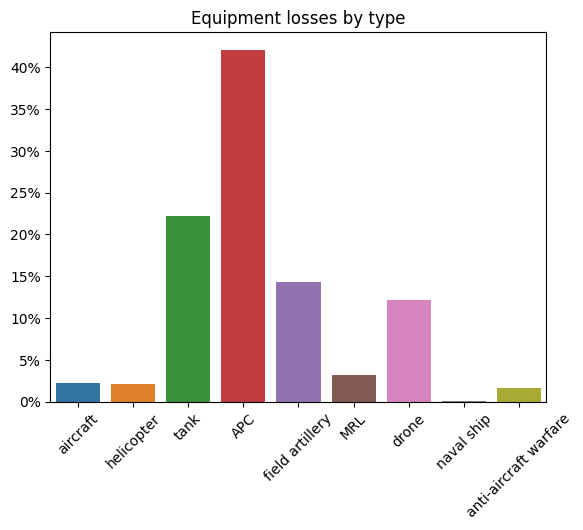

In [10]:
# quiero saber el porcentaje de bajas que son APC


column_names = []
results = []
for column in df_equipment:
    if column != 'total losses':
        column_names.append(column)
        results.append(sum(df_equipment[column]) /  sum(df_equipment['total losses']) * 100)

sns.barplot(x=column_names, y=results)
plt.tick_params(axis='x', labelrotation = 45)
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35, 40], ['0%', '5%', '10%', '15%', '20%', '25%', '30%', '35%', '40%'])
plt.title('Equipment losses by type')
plt.show()


Puedo concluir:
- Que la mayoría de bajas son de APC, las cuales implican que hay bajas humanas simultáneamente
- Que la mayor parte de bajas diarias para el período de 6 a 9 meses están por debajo de la mediana
- Que, como hemos visto en le hipótesis 1, las bajas humanas para este período (aproximadamente) también se reducen
- Se deduce, pues, que las menores bajas humanas para este período se deben a que se han destruido menos APC
- Recordemos que en este punto también suben mucho los refugiados. Es probable que Rusia se esté apoyando más en bombardeos y artillería en este período que en la conquista de territorio con infantería. Eso explicaría tanto el aumento de refugiados como la menor pérdida de convoyes de APC y de personal en general